In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pytesseract
import pandas as pd
import re

# Set tesseract path to where the tesseract exe file is located 
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [2]:
carplate_img = cv2.imread('2.png')
carplate_img_rgb = cv2.cvtColor(carplate_img, cv2.COLOR_BGR2RGB)

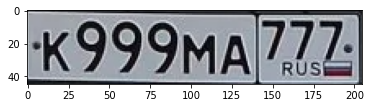

In [3]:
plt.imshow(carplate_img_rgb);

In [4]:
def enlarge_img(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    return resized_image

In [5]:
carplate_img_rgb = enlarge_img(carplate_img_rgb, 150)
carplate_extract_img = carplate_img_rgb

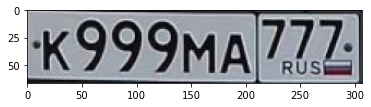

In [6]:
plt.imshow(carplate_extract_img);

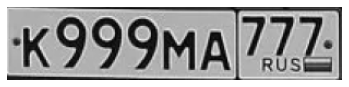

In [7]:
# Convert image to grayscale
carplate_extract_img_gray = cv2.cvtColor(carplate_extract_img, cv2.COLOR_RGB2GRAY)
plt.axis('off') 
plt.imshow(carplate_extract_img_gray, cmap = 'gray');

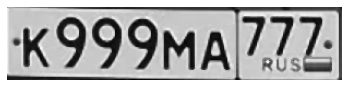

In [8]:
# Apply median blur + grayscale
carplate_extract_img_gray_blur = cv2.medianBlur(carplate_extract_img_gray,3) 
plt.axis('off') 
plt.imshow(carplate_extract_img_gray_blur, cmap = 'gray');

In [9]:
# Display the text extracted from the car plate
text = pytesseract.image_to_string(carplate_extract_img_gray_blur)
print(text)

K999MA777:



In [10]:
text = re.sub(r'\W+', '', text)
text = text.upper()
text

'K999MA777'

In [11]:
df = pd.read_csv('real_numbers.csv')
df = df[['text']]
df.sample(10)

,text
23556,A182OC35
6046,В025ТО35
25293,X329HT99
14776,K816XX46
9674,Y804YH54
24964,H792MX58
4905,В404КА35
19064,B193CB35
3905,B726YM35
12346,E647AM35


In [12]:
def check_in_db(text):
    if df['text'].str.contains(text).any() == True:
            print('ДОСТУП РАЗРЕШЁН')
    else:
        print('РУЧНОЙ КОНТРОЛЬ')

In [13]:
check_in_db(text)

РУЧНОЙ КОНТРОЛЬ
